In [0]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/SMAI/2019201089-Assignment 2/Datasets/Question-2')

In [0]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
import seaborn as sns; sns.set()
from matplotlib import style
import numpy as np
from scipy.stats import norm
import pickle

np.random.seed(0)


def load(name):
    file = open(name,'rb')
    data = pickle.load(file)
    file.close()
    return data

def save(data,name):
    file = open(name, 'wb')
    pickle.dump(data,file)
    file.close()

class GMM1D:
    def __init__(self,X,iterations,initmean,initprob,initvariance):
        """initmean = [a,b,c] initprob=[1/3,1/3,1/3] initvariance=[d,e,f] """    
        self.iterations = iterations
        self.X = X
        self.mu = initmean
        self.pi = initprob
        self.var = initvariance
        self.l0 = []
        self.l1 = []
        self.l2 = []
        self.log_val = []
    
    """E step"""

    def calculate_prob(self,r):
        for c,g,p in zip(range(3),[(self.mu[0],self.var[0]),
                                       (self.mu[1],self.var[1]),
                                       (self.mu[2],self.var[2])],self.pi):
            r[:,c] = p*((1/(2*np.pi*g[1])**0.5)*np.exp(-1*(self.X-g[0])**2/(2*g[1]))).flatten()
        
        l0,l1,l2 = np.sum(np.log(r), axis=0)
        self.l0.append(l0)
        self.l1.append(l1)
        self.l2.append(l2)

        """
        Normalize the probabilities such that each row of r sums to 1 and weight it by mu_c == the fraction of points belonging to 
        cluster c
        """
        for i in range(len(r)):
        	# Write code here
            r[i] /= np.sum(r[i])
        return r
    
    def plot(self,r):
        fig = plt.figure(figsize=(10,10))
        ax0 = fig.add_subplot(111)
        for i in range(len(r)):
            ax0.scatter(self.X[i],0,c=np.array([r[i][0],r[i][1],r[i][2]]),s=100)
        """Plot the gaussians"""
        for g,c in zip([norm(loc=self.mu[0],scale=self.var[0]).pdf(np.linspace(-20,20,num=60)),
                        norm(loc=self.mu[1],scale=self.var[1]).pdf(np.linspace(-20,20,num=60)),
                        norm(loc=self.mu[2],scale=self.var[2]).pdf(np.linspace(-20,20,num=60))],['r','g','b']):
            ax0.plot(np.linspace(-20,20,num=60),g,c=c)
    
    def run(self):
        
        for iter in range(1, self.iterations+1):

            """Create the array r with dimensionality nxK"""
            r = np.zeros((len(self.X),3))  

            """
            Probability for each datapoint x_i to belong to gaussian g 
            """
            r = self.calculate_prob(r)


            """Plot the data"""
            if iter%(int(self.iterations/10)) == 0:
                print('iter \t\t',iter)
                self.plot(r)
                plt.show()
            
            """M-Step"""

            """calculate m_c"""
            # m_c = []
            # write code here
            m_c = np.sum(r, axis=0)
            
            """calculate pi_c"""
            # write code here
            self.pi = m_c / len(self.X)
            
            """calculate mu_c"""
            # write code here
            # self.mu = 
            self.mu = np.sum(r*self.X, axis=0) / m_c

            """calculate var_c"""
            # var_c = []
            #write code here
            self.var = np.sum(r * (self.mu - self.X)**2, axis=0) / m_c

            value = -np.sum(np.log(self.pi * (1/(2*np.pi*self.var)**0.5)*np.exp(-1*(self.X-self.mu)**2/(2*self.var))))
            self.log_val.append(value)



In [0]:

# load the file
data = np.array([0]).reshape((1,1))
mean = []
var = []
for i in range(1, 4):
    temp = load("dataset"+str(i)+".pkl")
    mean.append(temp.mean(axis=0)[0])
    var.append(temp.var(axis=0)[0])
    data = np.append(data, temp, axis=0)
data = data[1:, :]

iter 		 15


iter 		 30


iter 		 45


iter 		 60


iter 		 75


iter 		 90


iter 		 105


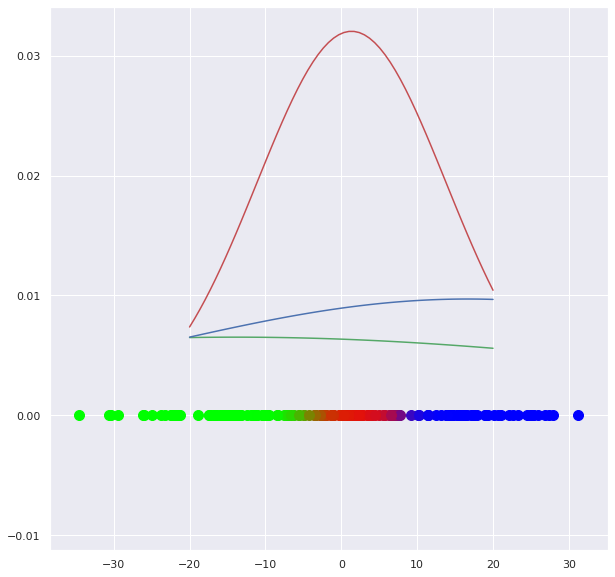

iter 		 120


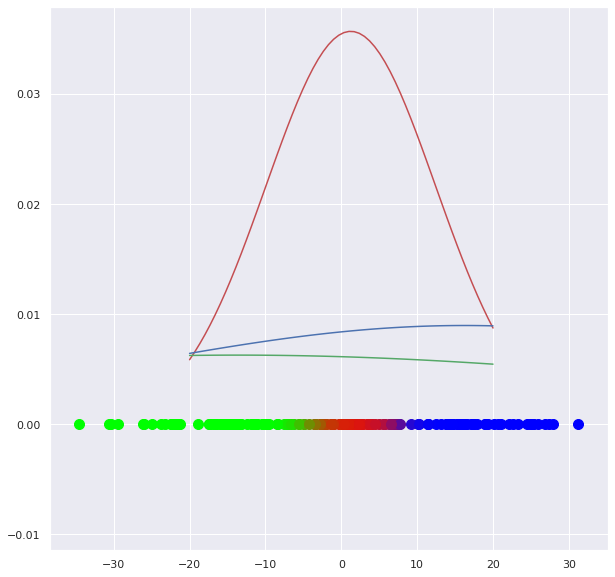

iter 		 135


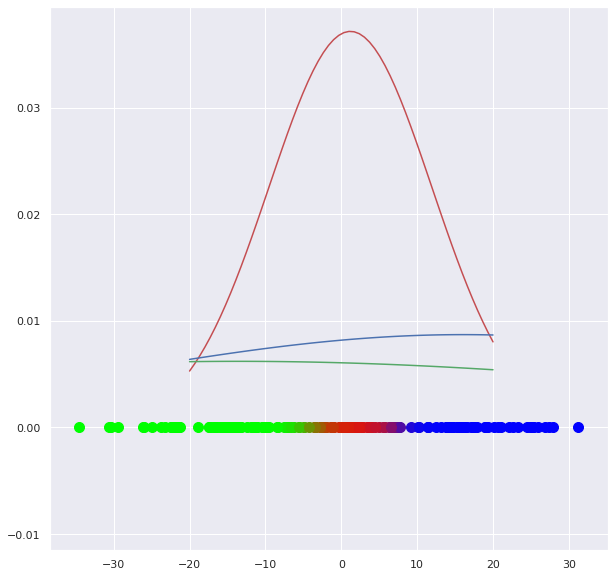

iter 		 150


means	 [  1.17865045 -13.51256696  15.98748247]
weights	 [0.25457885 0.42339876 0.32202239]
var	 [10.54274289 64.61035133 46.45523335]


In [21]:
# To run the code - 
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

g = GMM1D(data,150,np.array(mean),[1/3,1/3,1/3],np.array(var))
g.run()
print('means\t',g.mu)
print('weights\t',g.pi)  
print('var\t',g.var) 

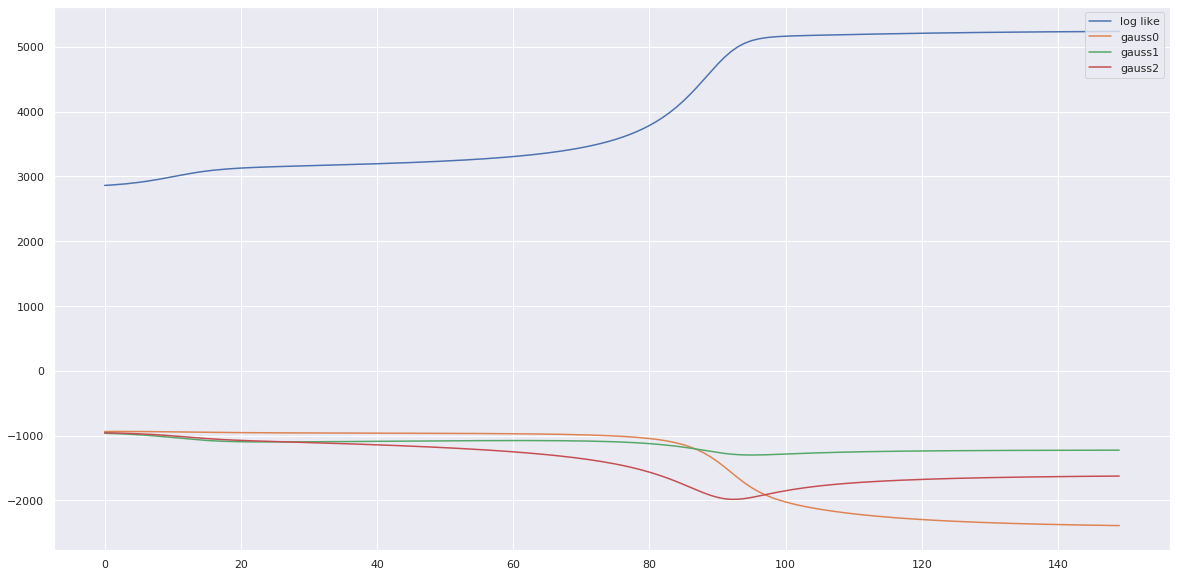

In [22]:
plt.plot(list(range(150)), g.log_val, label='log like')
plt.plot(list(range(150)), g.l0, label='gauss0')
plt.plot(list(range(150)), g.l1, label='gauss1')
plt.plot(list(range(150)), g.l2, label='gauss2')

plt.legend(loc='upper right')
plt.show()

iter 		 1000


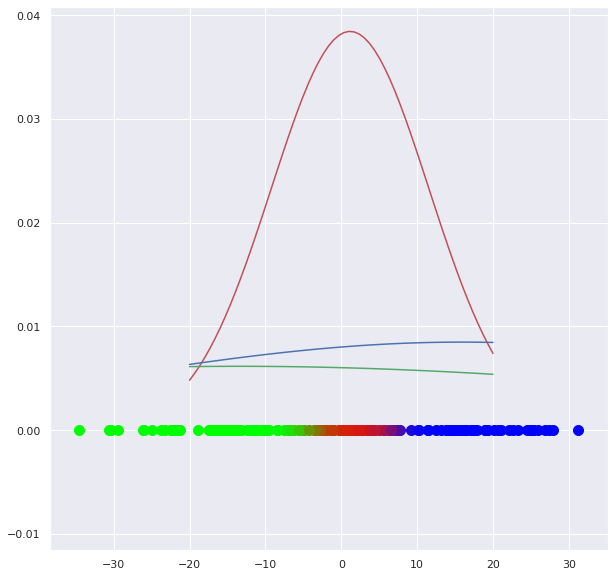

iter 		 2000


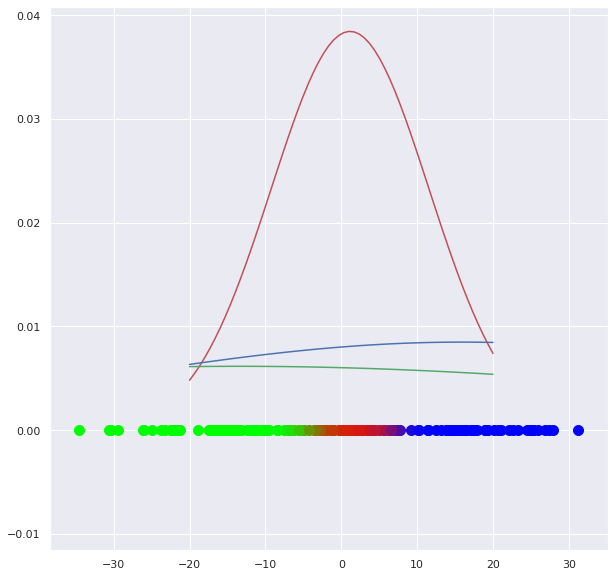

iter 		 3000


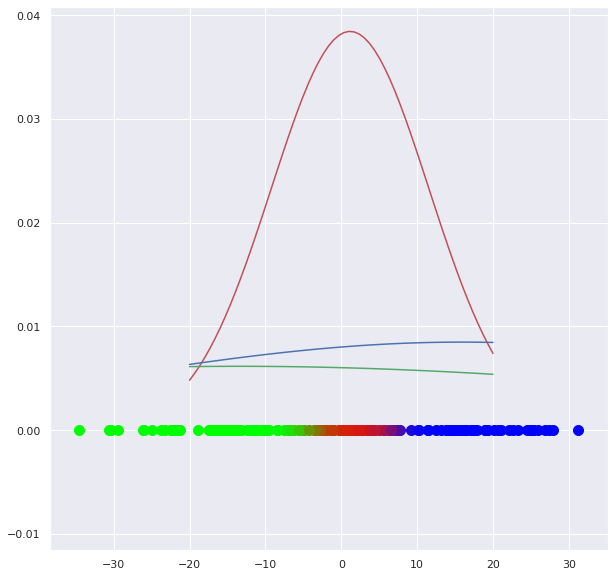

iter 		 4000


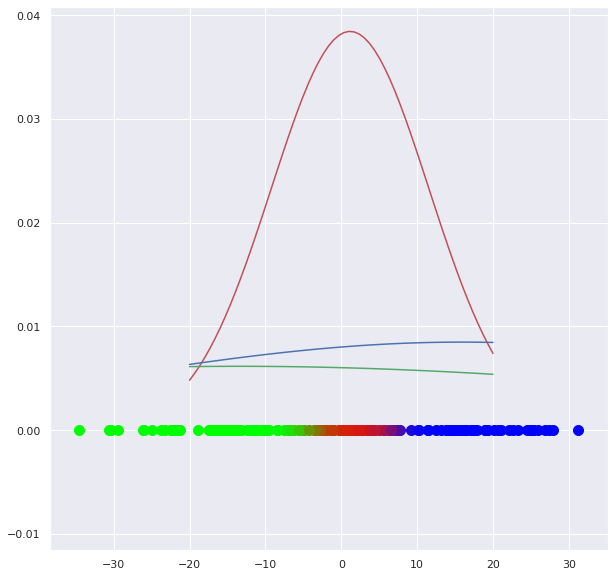

iter 		 5000


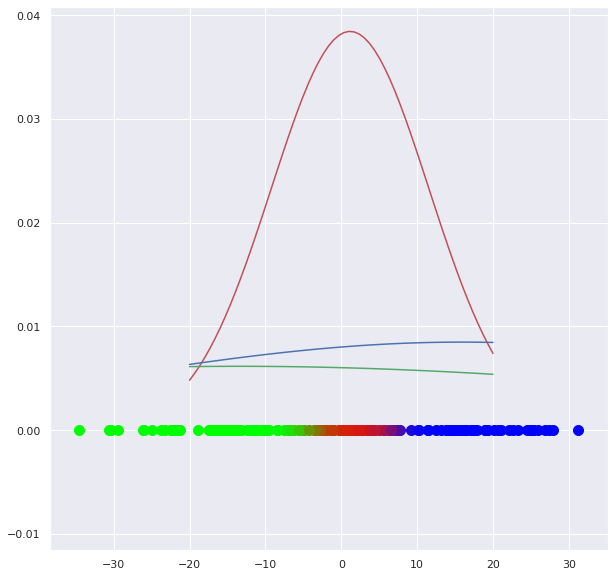

iter 		 6000


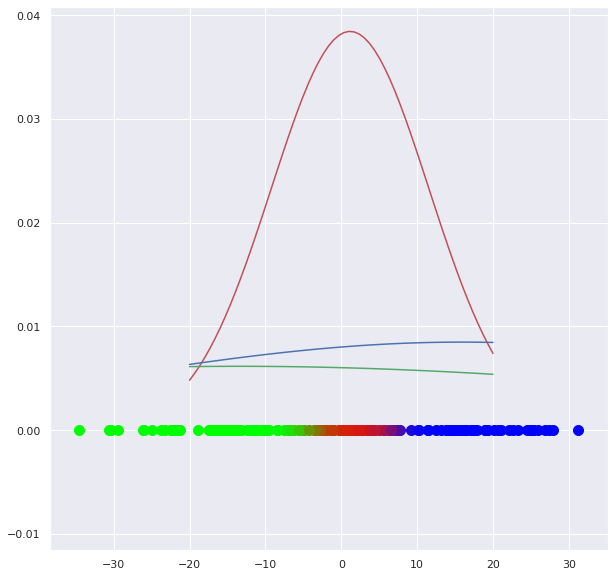

iter 		 7000


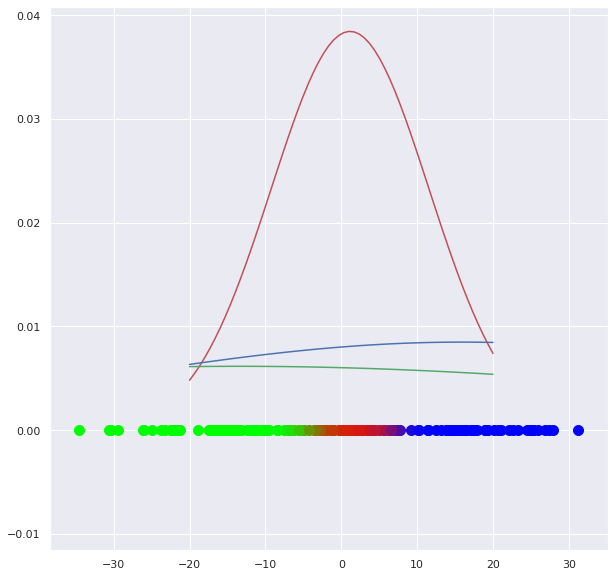

iter 		 8000


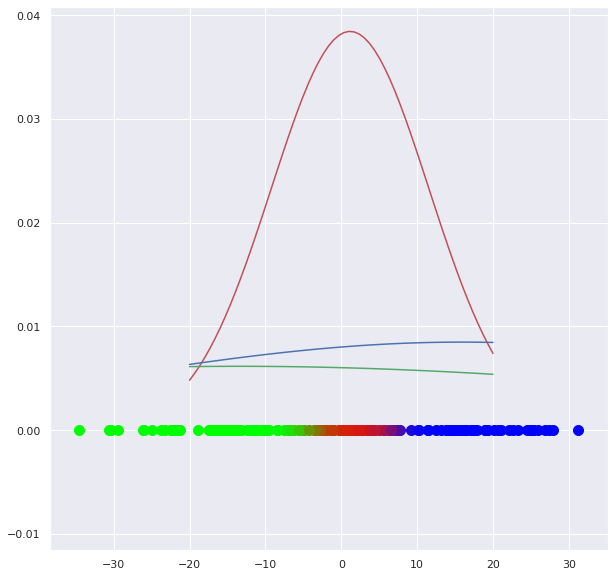

iter 		 9000


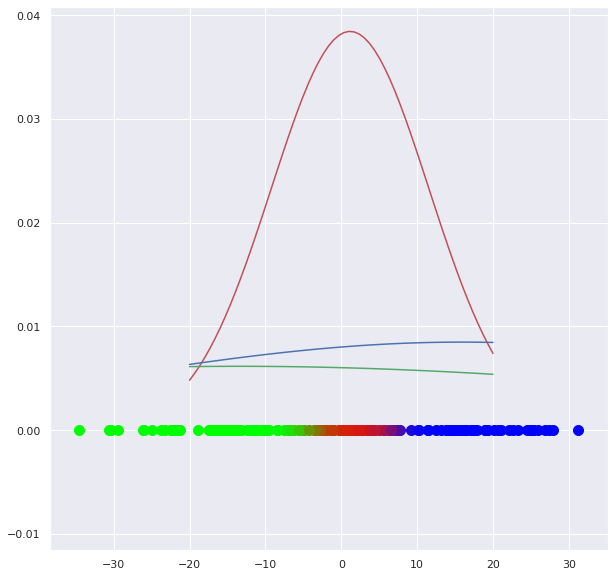

iter 		 10000


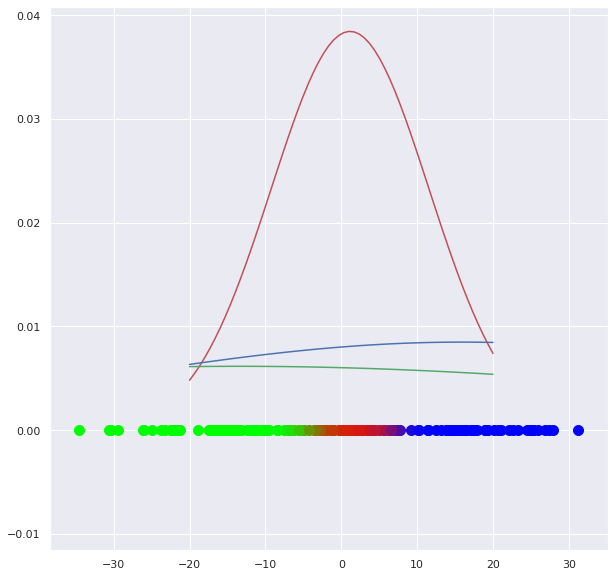

means	 [  1.15728627 -13.49122598  15.92063119]
weights	 [0.25194695 0.42411021 0.32394284]
var	 [10.37888573 64.81356709 47.00635876]


In [23]:
# To run the code - 
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

g = GMM1D(data,10000,np.array(mean),[1/3,1/3,1/3],np.array(var))
g.run()
print('means\t',g.mu)
print('weights\t',g.pi)  
print('var\t',g.var)

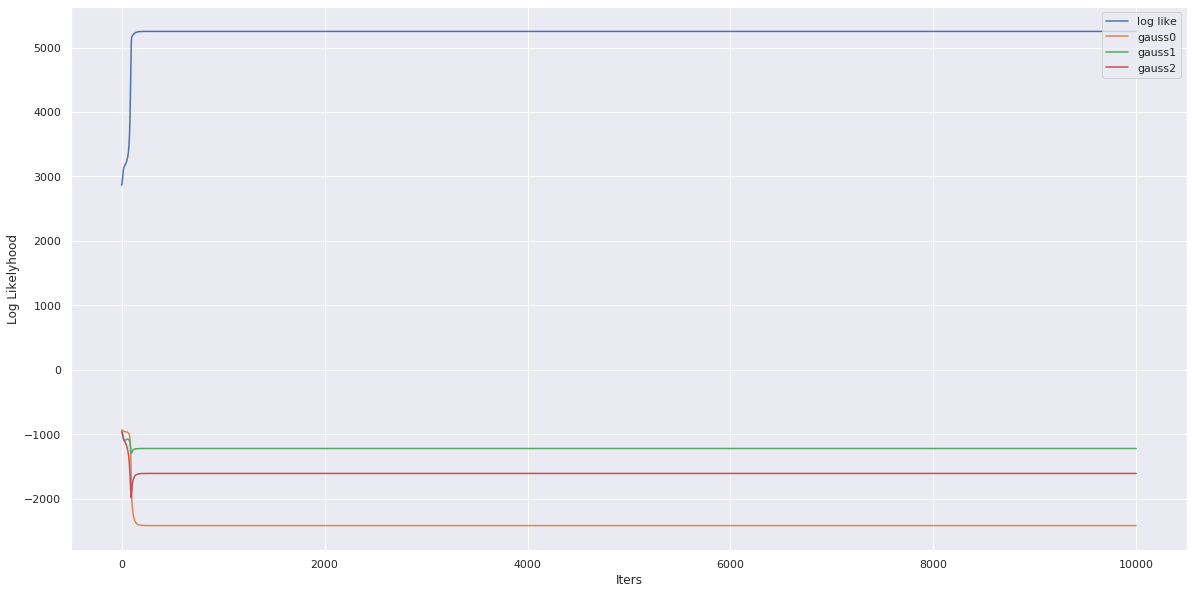

In [24]:
plt.plot(list(range(10000)), g.log_val, label='log like')
plt.plot(list(range(10000)), g.l0, label='gauss0')
plt.plot(list(range(10000)), g.l1, label='gauss1')
plt.plot(list(range(10000)), g.l2, label='gauss2')
plt.xlabel('Iters')
plt.ylabel('Log Likelyhood')
plt.legend(loc='upper right')
plt.show()

##Comparision with Sklearn GMM

In [25]:
from sklearn.mixture import GaussianMixture

gaussian_mixture = GaussianMixture(n_components=3,verbose=True)
gaussian_mixture.fit(data)

Initialization 0
Initialization converged: True


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=True,
                verbose_interval=10, warm_start=False, weights_init=None)

In [26]:
print('Means      \t', '\t'.join([str(i[0]) for i in gaussian_mixture.means_]))
print('Pi         \t', '\t'.join([str(i) for i in gaussian_mixture.weights_]))
print('Covarience \t', '\t'.join([str(i[0][0]) for i in gaussian_mixture.covariances_]))
print('Iters \t\t\t', gaussian_mixture.n_iter_)

Means      	 17.120948620568853	-14.783441580598977	1.231540811261556
Pi         	 0.2892535155822596	0.38091988469175286	0.32982659972598743
Covarience 	 37.591167102205965	53.21780162414795	16.028784412609127
Iters 			 7


In [27]:
data.shape

(180, 1)

In [28]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3,verbose=True)
model = gmm.fit(data)
labels = gmm.predict(data)

Initialization 0
Initialization converged: True


In [29]:
labels

array([2, 0, 1, 2, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2,
       2, 2, 1, 2, 2, 0, 1, 1, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 1, 0, 2, 1,
       0, 1, 0, 1, 2, 2, 1, 2, 0, 2, 0, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0,
       2, 0, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0,
       1, 2, 0, 0, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 2, 0, 2, 2, 1, 0, 1, 2, 1, 1, 2, 0, 1, 2, 1, 2, 2, 0,
       1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 1, 0, 0, 1, 2, 0, 0, 0,
       1, 0, 2, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 2, 1, 1, 0, 2, 0, 1, 0, 0,
       2, 1, 1, 0])

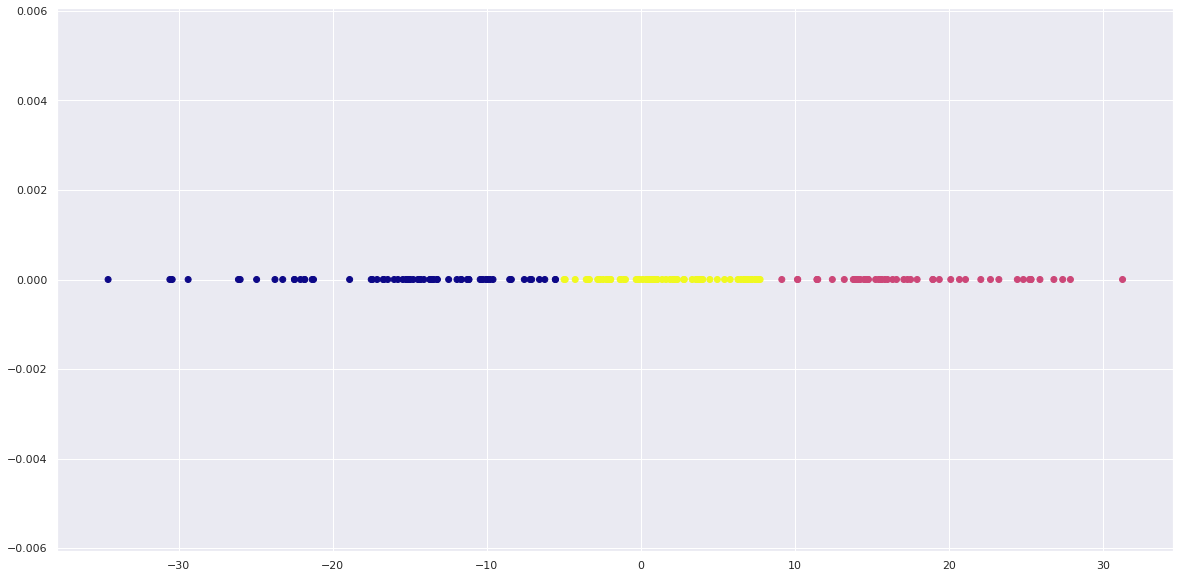

In [30]:

plt.scatter(data[:,0], list([0 for i in range(len(data))]),c=labels, cmap='plasma')